In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

# Lecture 14

## Optional: Advanced `where` ##

In [2]:
names = make_array('John','Jane','Joe','Jerry','Jill','Jeff','Jim','Jamie')
ages = make_array(16, 22, 18, 15, 19, 15, 16, 21)
age = Table().with_columns('Name', names,
                           'Age', ages)

In [3]:
age

Name,Age
John,16
Jane,22
Joe,18
Jerry,15
Jill,19
Jeff,15
Jim,16
Jamie,21


In [4]:
age.where('Age',are.above_or_equal_to(18))

Name,Age
Jane,22
Joe,18
Jill,19
Jamie,21


In [13]:
18 < ages

array([False,  True, False, False,  True, False, False,  True], dtype=bool)

In [8]:
age.where(voter)

Name,Age
Jane,22
Joe,18
Jill,19
Jamie,21


## For statements

In [14]:
for pet in make_array('cat', 'dog', 'rabbit'):
    print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [15]:
temporary = make_array('cat', 'dog', 'rabbit')

pet = temporary.item(0)
print('I love my ' + pet)

pet = temporary.item(1)
print('I love my ' + pet)

pet = temporary.item(2)
print('I love my ' + pet)

I love my cat
I love my dog
I love my rabbit


In [21]:
for i in np.arange(5):
    print(i)

0
1
2
3
4


In [22]:
for i in np.arange(5):
    print('Data 111 is awesome!')

Data 111 is awesome!
Data 111 is awesome!
Data 111 is awesome!
Data 111 is awesome!
Data 111 is awesome!


In [24]:
s = make_array(2, 3)
np.append(s,4)
s

array([2, 3])

In [25]:
s+3
s

array([2, 3])

In [26]:
s = np.append(s,4)
s

array([2, 3, 4])

In [27]:
def one_round(my_roll, your_roll):
    if my_roll > your_roll:
        return 1
    elif your_roll > my_roll:
        return -1
    else:
        return 0

In [28]:
def simulate_one_round():
    my_roll = np.random.choice(np.arange(1,7))
    your_roll = np.random.choice(np.arange(1,7))
    return one_round(my_roll,your_roll)

In [29]:
game_outcomes = make_array()

for i in np.arange(10000):
    game_outcomes = np.append(game_outcomes, simulate_one_round())
    
game_outcomes

array([ 1.,  1.,  1., ...,  1., -1.,  1.])

In [30]:
sum(game_outcomes)

38.0

In [31]:
results = Table().with_column('My winnings', game_outcomes)
results

My winnings
1
1
1
-1
1
0
1
-1
0
0


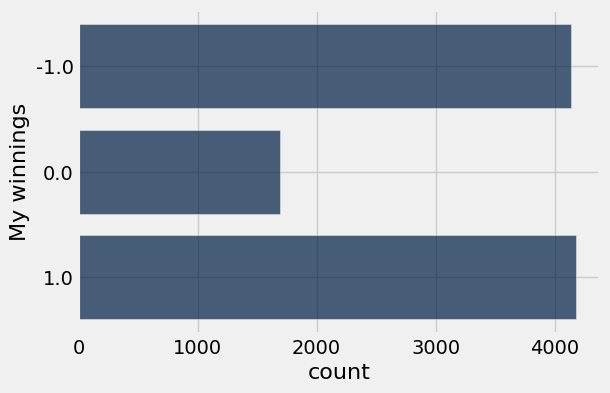

In [32]:
results.group('My winnings').barh('My winnings')

### Activity: simulating number of heads in 100 coin tosses

Fill in the cells below to simulate coin tosses

In [33]:
coin = make_array('heads','tails')

Simulate a coin toss 100 times.

In [42]:
np.random.choice(coin, 100)

array(['heads', 'tails', 'heads', 'tails', 'heads', 'tails', 'tails',
       'heads', 'tails', 'heads', 'tails', 'heads', 'tails', 'heads',
       'tails', 'tails', 'tails', 'tails', 'heads', 'heads', 'heads',
       'heads', 'heads', 'tails', 'heads', 'heads', 'heads', 'heads',
       'heads', 'tails', 'tails', 'heads', 'heads', 'tails', 'tails',
       'heads', 'tails', 'heads', 'heads', 'heads', 'tails', 'tails',
       'tails', 'heads', 'heads', 'tails', 'heads', 'heads', 'tails',
       'tails', 'heads', 'heads', 'tails', 'tails', 'tails', 'heads',
       'heads', 'heads', 'tails', 'tails', 'heads', 'heads', 'heads',
       'heads', 'heads', 'heads', 'tails', 'tails', 'heads', 'tails',
       'heads', 'heads', 'tails', 'heads', 'tails', 'heads', 'heads',
       'heads', 'heads', 'tails', 'heads', 'tails', 'heads', 'heads',
       'tails', 'tails', 'tails', 'heads', 'heads', 'tails', 'heads',
       'heads', 'heads', 'tails', 'heads', 'tails', 'tails', 'tails',
       'tails', 'tai

How many times out of 100 coin tosses do you get "heads"? 

In [43]:
sum(np.random.choice(coin, 100) == 'heads')

51

In [44]:
# Simulate one outcome
def num_heads():
    return sum(np.random.choice(coin, 100) == 'heads')

In [45]:
# Decide how many times you want to repeat the experiment
repetitions = 10000

In [46]:
# Simulate that many outcomes
outcomes = make_array()

for i in np.arange(repetitions):
    outcomes = np.append(outcomes, num_heads())
    


In [47]:
outcomes

array([ 57.,  59.,  57., ...,  55.,  53.,  50.])

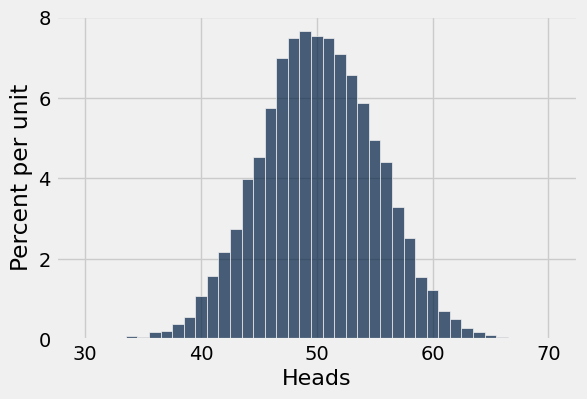

In [48]:
heads = Table().with_column('Heads', outcomes)
heads.hist(bins = np.arange(29.5, 70.6))

### The Monty Hall Problem ###

In [49]:
goats = make_array('first goat', 'second goat')

In [50]:
def other_goat(x):
    if x == 'first goat':
        return 'second goat'
    elif x == 'second goat':
        return 'first goat'

In [51]:
[other_goat('first goat'), other_goat('second goat')]

['second goat', 'first goat']

In [52]:
hidden_behind_doors = np.append(goats, 'car')
hidden_behind_doors

array(['first goat', 'second goat', 'car'],
      dtype='<U11')

In [53]:
def monty_hall_game():
    """Return 
    [contestant's guess, what Monty reveals, what remains behind the other door]"""
    
    contestant_guess = np.random.choice(hidden_behind_doors)
    
    if contestant_guess == 'first goat':
        return [contestant_guess, 'second goat', 'car']
    
    if contestant_guess == 'second goat':
        return [contestant_guess, 'first goat', 'car']
    
    if contestant_guess == 'car':
        revealed = np.random.choice(goats)
        return [contestant_guess, revealed, other_goat(revealed)]

In [54]:
monty_hall_game()

['car', 'second goat', 'first goat']

In [55]:
games = Table(['Guess', 'Revealed', 'Remaining'])

for i in np.arange(10000):
    games.append(monty_hall_game())

In [56]:
games.show(10)

Guess,Revealed,Remaining
first goat,second goat,car
second goat,first goat,car
car,first goat,second goat
second goat,first goat,car
car,second goat,first goat
second goat,first goat,car
second goat,first goat,car
second goat,first goat,car
car,second goat,first goat
car,first goat,second goat


In [57]:
original_choice = games.group('Guess')
original_choice

Guess,count
car,3318
first goat,3316
second goat,3366


In [58]:
remaining_door = games.group('Remaining')
remaining_door

Remaining,count
car,6682
first goat,1657
second goat,1661


In [59]:
joined = original_choice.join('Guess', remaining_door, 'Remaining')
combined = joined.relabeled(0, 'Item').relabeled(1, 'Original Door').relabeled(2, 'Remaining Door')
combined

Item,Original Door,Remaining Door
car,3318,6682
first goat,3316,1657
second goat,3366,1661


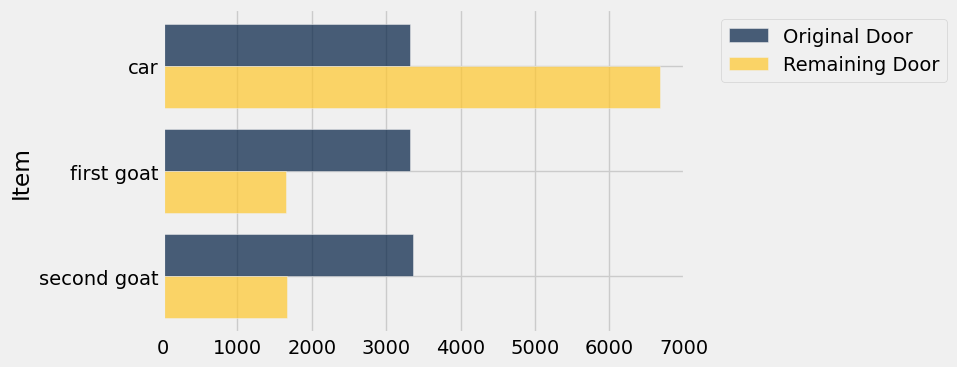

In [60]:
combined.barh(0)